## 1. IMPORTANDO O DATAFRAME E AS BIBLIOTECAS

In [1]:
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Carregar a base de dados
df = pd.read_csv('cancelamentos_original.csv')


df_head = df.head()
df_info = df.info()
df_description = df.describe(include='all')

df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881666 entries, 0 to 881665
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CustomerID              881664 non-null  float64
 1   idade                   881664 non-null  float64
 2   sexo                    881664 non-null  object 
 3   tempo_como_cliente      881663 non-null  float64
 4   frequencia_uso          881663 non-null  float64
 5   ligacoes_callcenter     881664 non-null  float64
 6   dias_atraso             881664 non-null  float64
 7   assinatura              881661 non-null  object 
 8   duracao_contrato        881663 non-null  object 
 9   total_gasto             881664 non-null  float64
 10  meses_ultima_interacao  881664 non-null  float64
 11  cancelou                881664 non-null  float64
dtypes: float64(9), object(3)
memory usage: 80.7+ MB


,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


## 2. REALIZANDO O TRATAMENTO DOS DADOS DO DATAFRAME: 

    Elementos Faltantes
    Variavél Categórica
    Normalização dos Dados
    Validação dos Dados
    Visualização dos Dados (Matriz de Correlação e  BoxPlots)


## 2.1 - ELEMENTOS FALTANTES

In [2]:
# Verificando valores ausentes
valores_ausentes = df.isnull().sum()

# Calculando a porcentagem de valores ausentes
porcentagem_ausentes = (valores_ausentes / len(df)) * 100

# Juntando em um DataFrame
faltantes = pd.DataFrame({
    'Quantidade de Nulos': valores_ausentes,
    'Porcentagem (%)': porcentagem_ausentes
})

# Filtrando as colunas com pelo menos 1 valor ausente
faltantes = faltantes[faltantes['Quantidade de Nulos'] > 0]

# Exibindo o resultado
if faltantes.empty:
    print("A planilha 'cancelamentos_original.csv' **não possui valores faltantes**.")
else:
    print("Colunas com valores ausentes:\n")
    print(faltantes.sort_values(by='Porcentagem (%)', ascending=False))


Colunas com valores ausentes:

                        Quantidade de Nulos  Porcentagem (%)
assinatura                                5         0.000567
tempo_como_cliente                        3         0.000340
frequencia_uso                            3         0.000340
duracao_contrato                          3         0.000340
CustomerID                                2         0.000227
idade                                     2         0.000227
sexo                                      2         0.000227
ligacoes_callcenter                       2         0.000227
dias_atraso                               2         0.000227
total_gasto                               2         0.000227
meses_ultima_interacao                    2         0.000227
cancelou                                  2         0.000227


In [3]:
# Verificando quantas linhas serão removidas antes de executar o dropna

colunas_valores_nulos = [
    'CustomerID', 'cancelou', 'idade', 'sexo', 'tempo_como_cliente', 
    'frequencia_uso', 'ligacoes_callcenter', 'dias_atraso',
    'assinatura', 'duracao_contrato', 'total_gasto', 'meses_ultima_interacao'
]

# Contando quantas linhas possuem pelo menos um valor nulo nessas colunas
linhas_com_nulos = df[colunas_valores_nulos].isnull().any(axis=1).sum()

print(f"Número de linhas com pelo menos um valor nulo: {linhas_com_nulos}")
print(f"A quantidade de linhas representa {(linhas_com_nulos / len(df)) * 100:.6f}% do total de dados de 881 mil linhas.")

#Removendo as linhas com valores nulos
df = df.dropna(subset=colunas_valores_nulos)



Número de linhas com pelo menos um valor nulo: 7
A quantidade de linhas representa 0.000794% do total de dados de 881 mil linhas.


In [4]:
#Conferindo se ainda possui valores nulos no novo dataframe
valores_nulos = df.isnull().sum()

# Exibir apenas colunas com valores nulos
valores_nulos = valores_nulos[valores_nulos > 0]

if valores_nulos.empty:
    print("\nNenhum valor nulo encontrado no DataFrame tratado!\n")
else:
    print("Ainda há valores nulos nas seguintes colunas:\n")
    print(valores_nulos)


Nenhum valor nulo encontrado no DataFrame tratado!



In [5]:
#Verificando se possui valores duplicados no DataFrame após a eliminação das linhas com os valores nulos

duplicadas = df.duplicated().sum()

print(f"Número de linhas duplicadas encontradas: {duplicadas}")

# Se houver duplicatas, você pode removê-las assim:
if duplicadas > 0:
    df = df.drop_duplicates()
    print("As linhas duplicadas removidas.")
else:
    print("Nenhuma linha duplicada encontrada.")


# Salvando o dataframe após remover duplicadas e tratar os elementos faltantes
df.to_csv('cancelamentos_sem_faltantes.csv', index=False)

Número de linhas duplicadas encontradas: 440827
As linhas duplicadas removidas.


## 2.2 - VARIAVÉIS CATEGÓRICAS

In [6]:
#Carregando o novo arquivo tratado para o tratamento das variaveis categoricas
df = pd.read_csv('cancelamentos_sem_faltantes.csv')
df_head

,CustomerID,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [7]:
#Identificando as colunas com as variaveis categoricas
colunas_categoricas = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Variáveis categóricas:", colunas_categoricas)

for coluna in ['sexo', 'assinatura', 'duracao_contrato']:
    print(f"\nColuna: {coluna}")
    print(df[coluna].value_counts())



Variáveis categóricas: ['sexo', 'assinatura', 'duracao_contrato']

Coluna: sexo
sexo
Male      250252
Female    190580
Name: count, dtype: int64

Coluna: assinatura
assinatura
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64

Coluna: duracao_contrato
duracao_contrato
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


In [8]:
# Tradução
df['sexo'] = df['sexo'].replace({'Male': 'Masculino', 'Female': 'Feminino'})
df['assinatura'] = df['assinatura'].replace({'Basic': 'Básico', 'Standard': 'Padrão', 'Premium': 'Premium'})
df['duracao_contrato'] = df['duracao_contrato'].replace({'Monthly': 'Mensal', 'Quarterly': 'Trimestral', 'Annual': 'Anual'})

# Mapeamento binário
df['sexo'] = df['sexo'].map({'Masculino': 1, 'Feminino': 0})

# One-hot encoding (sobrescrevendo o df)
df = pd.get_dummies(df, columns=['assinatura', 'duracao_contrato'], prefix=['assinatura', 'contrato'], drop_first=True)

print(df.columns.tolist())
print(df.head())


df = df.astype({
    'assinatura_Padrão': 'int',
    'assinatura_Premium': 'int',
    'contrato_Mensal': 'int',
    'contrato_Trimestral': 'int'
})


#Salvando o dataframe tratado
df.to_csv('cancelamentos_categoricos.csv', index=False)

['CustomerID', 'idade', 'sexo', 'tempo_como_cliente', 'frequencia_uso', 'ligacoes_callcenter', 'dias_atraso', 'total_gasto', 'meses_ultima_interacao', 'cancelou', 'assinatura_Padrão', 'assinatura_Premium', 'contrato_Mensal', 'contrato_Trimestral']
   CustomerID  idade  sexo  tempo_como_cliente  frequencia_uso  \
0         2.0   30.0     0                39.0            14.0   
1         3.0   65.0     0                49.0             1.0   
2         4.0   55.0     0                14.0             4.0   
3         5.0   58.0     1                38.0            21.0   
4         6.0   23.0     1                32.0            20.0   

   ligacoes_callcenter  dias_atraso  total_gasto  meses_ultima_interacao  \
0                  5.0         18.0        932.0                    17.0   
1                 10.0          8.0        557.0                     6.0   
2                  6.0         18.0        185.0                     3.0   
3                  7.0          7.0        396.0   

## 2.3 - NORMALIZAÇÃO DOS DADOS

In [9]:
# DataFrame com as variaveis categoricas devidamente tratado
df = pd.read_csv('cancelamentos_categoricos.csv')

# Selecionar as colunas numéricas contínuas
colunas_numericas = ['idade', 'tempo_como_cliente', 'frequencia_uso',
                     'ligacoes_callcenter', 'dias_atraso',
                     'total_gasto', 'meses_ultima_interacao']

# Aplicando a normalização Min-Max para ficar no intervalo de 0 a 1
scaler = MinMaxScaler()
df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

print("Resumo estatístico das colunas normalizadas (Min-Max):")
print(df[colunas_numericas].describe())

# Salvando o DataFrame normalizado
df.to_csv('cancelamentos_normalizacao.csv', index=False)

Resumo estatístico das colunas normalizadas (Min-Max):
               idade  tempo_como_cliente  frequencia_uso  ligacoes_callcenter  \
count  440832.000000       440832.000000   440832.000000        440832.000000   
mean        0.454748            0.512819        0.510603             0.360444   
std         0.264731            0.292470        0.296077             0.307022   
min         0.000000            0.000000        0.000000             0.000000   
25%         0.234043            0.254237        0.275862             0.100000   
50%         0.446809            0.525424        0.517241             0.300000   
75%         0.638298            0.762712        0.758621             0.600000   
max         1.000000            1.000000        1.000000             1.000000   

         dias_atraso    total_gasto  meses_ultima_interacao  
count  440832.000000  440832.000000           440832.000000  
mean        0.432191       0.590685                0.464858  
std         0.275269       0.

## 2.4 - VALIDAÇÃO DOS DADOS

Realizado a verificação de Outlier e depois a matriz de Correlação

In [10]:
# Verificando se possui Outliers

cancelamentos_normalizacao = pd.read_csv('cancelamentos_normalizacao.csv')

outliers_detectados = {}

for coluna in cancelamentos_normalizacao.select_dtypes(include=['float64', 'int64']):
    # Ignorar colunas binárias (com apenas dois valores únicos)
    if cancelamentos_normalizacao[coluna].nunique() <= 2:
        continue

    Q1 = cancelamentos_normalizacao[coluna].quantile(0.25)
    Q3 = cancelamentos_normalizacao[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = cancelamentos_normalizacao[
        (cancelamentos_normalizacao[coluna] < limite_inferior) |
        (cancelamentos_normalizacao[coluna] > limite_superior)
    ]

    if not outliers.empty:
        outliers_detectados[coluna] = outliers.shape[0]

# Exibindo o resultado
if outliers_detectados:
    print("Colunas com outliers detectados:")
    for coluna, qtd in outliers_detectados.items():
        print(f"- {coluna}: {qtd} outliers")
else:
    print("Nenhum outlier detectado nas colunas numéricas (exceto variáveis binárias).")


Nenhum outlier detectado nas colunas numéricas (exceto variáveis binárias).


## 2.5 - VISUALIZAÇÃO DOS DADOS (MATRIZ DE CORRELAÇÃO, BOXPLOTS E HISTOGRAMAS)

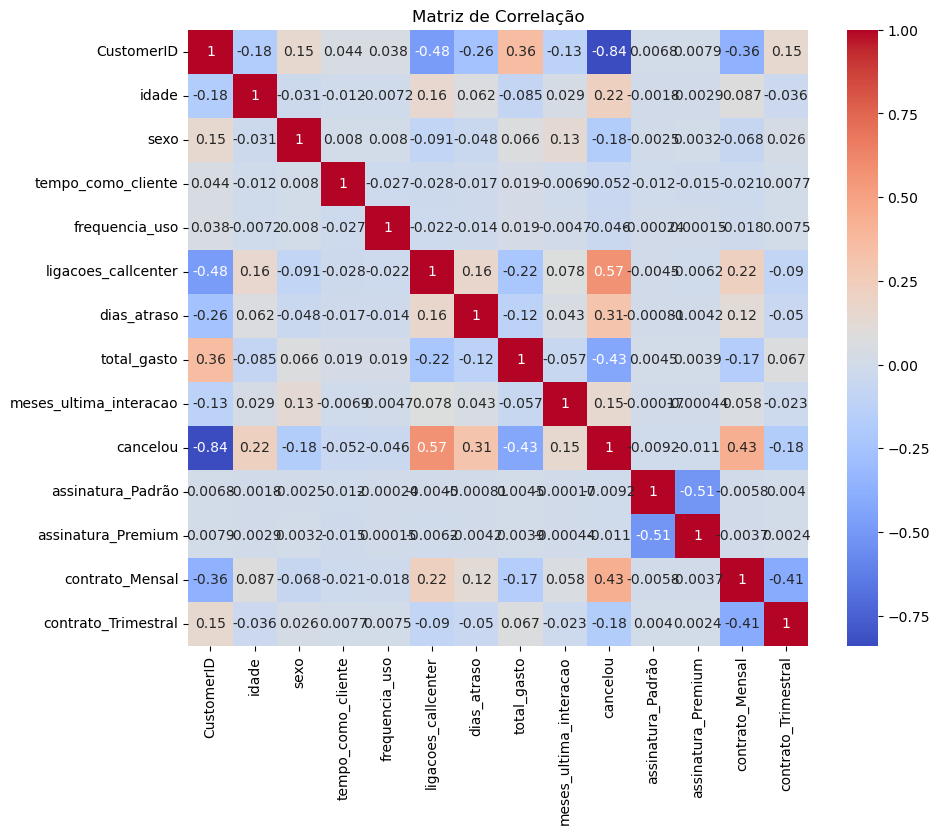

cancelou
1.0    0.567107
0.0    0.432893
Name: proportion, dtype: float64


In [11]:
#Plotando a Matriz de Correlação

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

#Verificando se a variavel alvo Cancelou está balanceada
print(df['cancelou'].value_counts(normalize=True))


In [12]:
correlacoes = df.corr()['cancelou'].sort_values(ascending=False)

for var, corr in correlacoes.items():
    if var != 'cancelou' and abs(corr) > 0.3:
        direcao = "positiva" if corr > 0 else "negativa"

        print(f"\n A variável '{var}' possui correlação {direcao} com 'cancelou' (valor = {corr:.2f}).")

        if var.lower() in ['customerid', 'id', 'clienteid']:  # tratamento especial para identificadores
            print(" Essa variável é um identificador único e não possui significado preditivo real.")
            print("Deve ser descartada antes da construção do modelo para evitar viés.")
            continue

        # Interpretação com impacto e utilidade
        if abs(corr) > 0.5:
            print("Correlação forte: essa variável pode ser um indicativo claro de cancelamento.")
        elif 0.3 < abs(corr) <= 0.5:
            print("Correlação moderada: pode contribuir para explicar o cancelamento.")

        # Complemento de análise
        print("Sugestão: Explore essa variável com outras para identificar padrões ou interações.")



 A variável 'ligacoes_callcenter' possui correlação positiva com 'cancelou' (valor = 0.57).
Correlação forte: essa variável pode ser um indicativo claro de cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'contrato_Mensal' possui correlação positiva com 'cancelou' (valor = 0.43).
Correlação moderada: pode contribuir para explicar o cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'dias_atraso' possui correlação positiva com 'cancelou' (valor = 0.31).
Correlação moderada: pode contribuir para explicar o cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'total_gasto' possui correlação negativa com 'cancelou' (valor = -0.43).
Correlação moderada: pode contribuir para explicar o cancelamento.
Sugestão: Explore essa variável com outras para identificar padrões ou interações.

 A variável 'CustomerID' possui cor

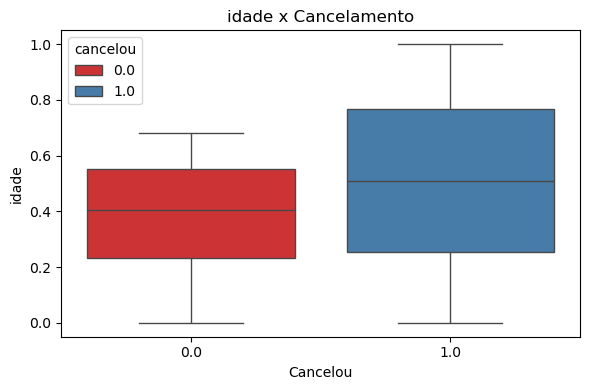

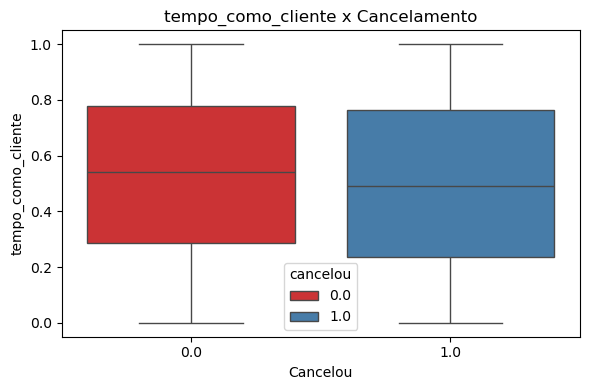

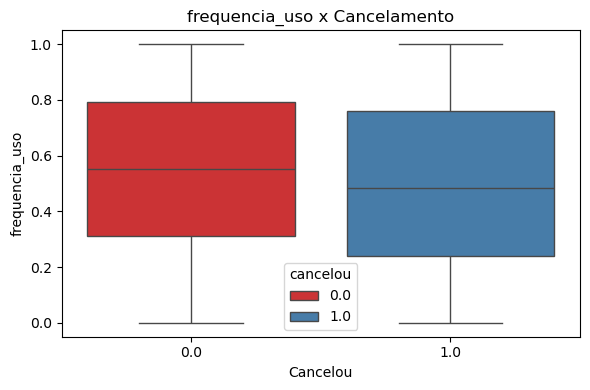

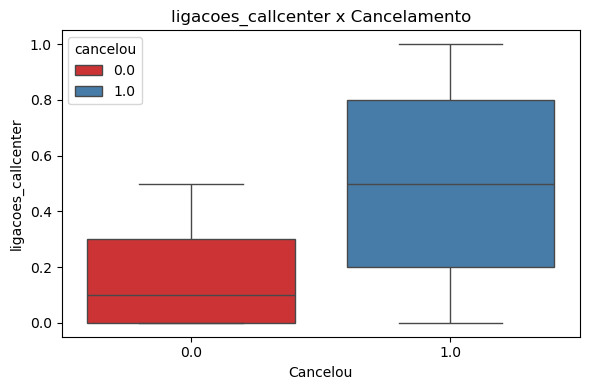

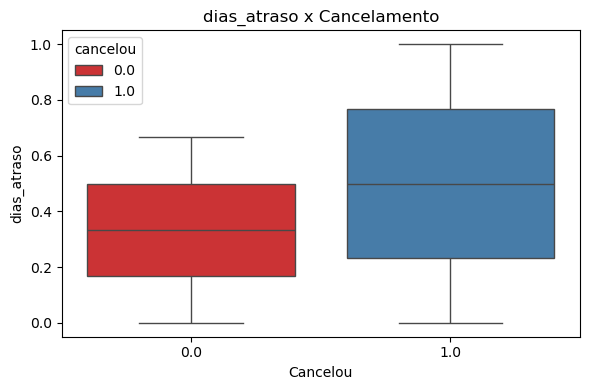

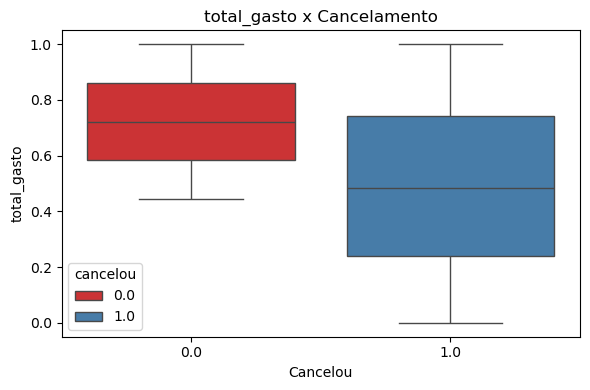

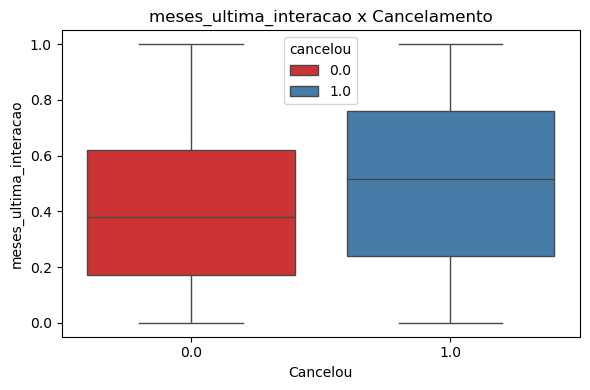

In [13]:
# BloxPlot para comparar com a variável-alvo

for coluna in colunas_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df, x='cancelou', y=coluna, hue='cancelou', palette='Set1')
    plt.title(f'{coluna} x Cancelamento')
    plt.xlabel('Cancelou')
    plt.ylabel(coluna)
    plt.tight_layout()
    plt.show()


## 2.6 - ELIMINANDO A VARIAVEL NÃO PREDITIVA

A coluna CustomerID foi removida por se tratar de um identificador único, sem valor preditivo para o modelo. Sua permanência poderia introduzir viés ou ruído na análise, visto que ela não representa uma característica comportamental ou demográfica do cliente.


In [14]:
removendo_id = df.drop(columns=['CustomerID'])

# Salvando o novo DataFrame para utilizar no treino e teste
removendo_id.to_csv('cancelamentos_predicao.csv', index=False)

## 3. SEPARAÇÃO DOS DADOS EM TREINO E TESTE

In [15]:
# DataFrame com as variaveis categoricas devidamente tratado
df = pd.read_csv('cancelamentos_predicao.csv')

# Separando features (X) e target (y)
X = df.drop('cancelou', axis=1) # todas as colunas de entrada, menos a coluna cancelou
y = df['cancelou'] # variavel alvo para a predição

# Separando entre treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Número de amostras que foram divididas para os conjuntos de treino e teste para as features (X) e a variável alvo (y).
print(f"X_treino: {X_treino.shape}")
print(f"X_teste: {X_teste.shape}")
print(f"y_treino: {y_treino.shape}")
print(f"y_teste: {y_teste.shape}")

# Certifique-se de que a pasta existe
pasta = '../Dados_Treino_Teste'

# Salvando os dados de treino e teste na pasta correta
X_treino.to_csv(f'{pasta}/X_treino.csv', index=False)
X_teste.to_csv(f'{pasta}/X_teste.csv', index=False)
y_treino.to_csv(f'{pasta}/y_treino.csv', index=False)
y_teste.to_csv(f'{pasta}/y_teste.csv', index=False)

print(" Os dados de treino e teste foram salvos com sucesso na pasta 'Dados_Treino_Teste'.")

X_treino: (352665, 12)
X_teste: (88167, 12)
y_treino: (352665,)
y_teste: (88167,)
 Os dados de treino e teste foram salvos com sucesso na pasta 'Dados_Treino_Teste'.
